In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch

from tqdm import tqdm
import time

from isingCA_local import isingCA

C:\Users\Heysoos\anaconda3\envs\torchstuff\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
CHANNELS=1 # number of channels in grid
RADIUS=1
# BETA=1/(RADIUS * RADIUS * CHANNELS)
BETA = 1/2.1
ca = isingCA(CHANNELS=CHANNELS, BETA=BETA, RADIUS=RADIUS).cuda() 

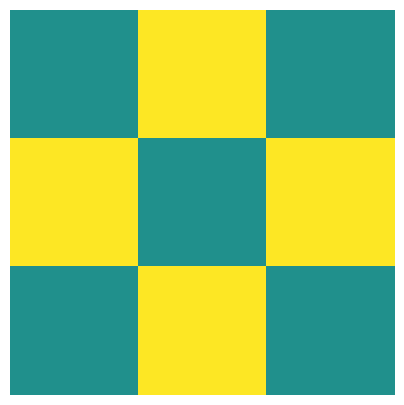

In [3]:
kernels = torch.cat([k for k in ca.rule.nearest_neighbours], dim=0).cpu().detach().numpy()
# kernels = totalistic(ca.rule.kernels[0].cpu().detach()).numpy()

num_plot_kernels = np.min([6, CHANNELS])
fig, axes = plt.subplots(1, num_plot_kernels, figsize=(5, 5))

if CHANNELS == 1:
    kplot = kernels[0, :, :]
    kmax = np.max(np.abs(kplot))
    axes.imshow(kplot, vmin=-kmax, vmax=kmax)
    axes.axis('off')
    
else:
    for j in range(num_plot_kernels):
        kplot = kernels[j, :, :]
        kmax = np.max(np.abs(kplot))
        axes[j].imshow(kplot, vmin=-kmax, vmax=kmax)
        axes[j].axis('off')

In [15]:
# sizes = [int(i) for i in np.linspace(10, 3500, 10)]
# sizes = [int(np.sqrt(i)) for i in 2 ** np.arange(4, 12)]
sizes = [int(np.sqrt(i)) for i in 2 ** np.arange(12, 27)]
print(sizes)

def time_model(model, sizes):
    res = []
    for RES in sizes:

        state = model.initGrid((RES, RES))
        state = model.forward(state)
        print(f'Starting model with {state[0, 0].numel()} elements.')
        
        t_start = time.time()
        for i in range(1000):
            state = model.forward(state)
        t_end = time.time()
    
        elapsed_time = t_end - t_start
        res.append(elapsed_time)
    return res

[64, 90, 128, 181, 256, 362, 512, 724, 1024, 1448, 2048, 2896, 4096, 5792, 8192]


In [16]:
ca.rule.temp_adapt = False
res = time_model(ca, sizes)

Starting model with 4096 elements.
Starting model with 8100 elements.
Starting model with 16384 elements.
Starting model with 32761 elements.
Starting model with 65536 elements.
Starting model with 131044 elements.
Starting model with 262144 elements.
Starting model with 524176 elements.
Starting model with 1048576 elements.
Starting model with 2096704 elements.
Starting model with 4194304 elements.
Starting model with 8386816 elements.
Starting model with 16777216 elements.
Starting model with 33547264 elements.
Starting model with 67108864 elements.


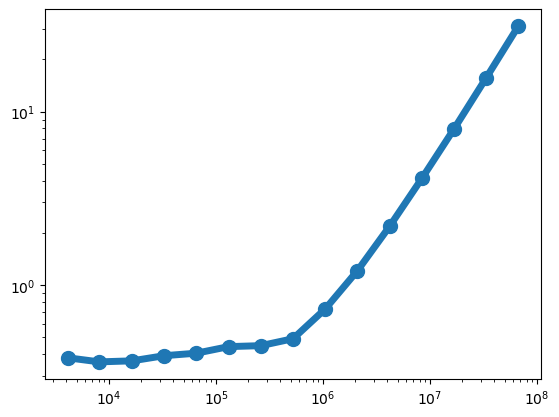

In [17]:
plt.plot([s*s for s in sizes], res, '-o', lw=5, ms=10)
plt.xscale('log')
plt.yscale('log')

In [14]:
ca.initGrid().shape

TypeError: initGrid() missing 1 required positional argument: 'shape'

In [33]:
ca.rule.temp_adapt = True
res_adapt = time_model(ca, sizes)

OutOfMemoryError: CUDA out of memory. Tried to allocate 3.35 GiB (GPU 0; 8.00 GiB total capacity; 3.92 GiB already allocated; 2.80 GiB free; 4.11 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [ ]:
plt.plot(sizes, res_adapt, '-o', lw=5, ms=10)

In [ ]:
n_pixels = [s ** 2 for s in sizes]
plt.plot(n_pixels, res, '-o', lw=5, ms=10, label='classic')
plt.plot(n_pixels, res_adapt, '-o', lw=5, ms=10, label='adaptive')
plt.xlabel('# of pixels')
plt.ylabel('compute time')
plt.legend()


In [110]:
del state

In [15]:
def time_rnn(sizes):
    res = []
    for s in sizes:
        rnn = torch.nn.RNN(1, s).cuda()
        input = torch.zeros(10000, 1).cuda()
        
        t_start = time.time()
        
        rnn.forward(input)
        
        t_end = time.time()    
        elapsed_time = t_end - t_start
        res.append(elapsed_time)
    return res

In [16]:
rnn_sizes = [10, 50, 100, 200, 500, 1000, 5000, 10000]
res_rnn = time_rnn(sizes=rnn_sizes)

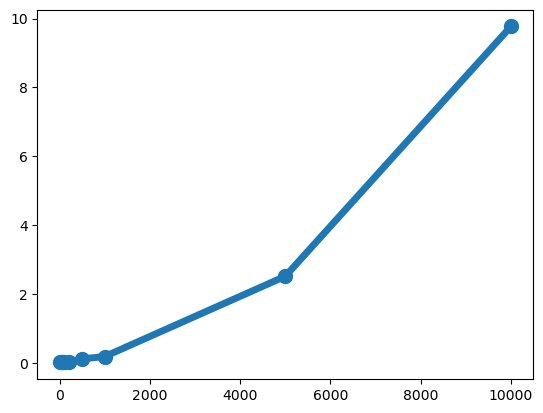

In [17]:
plt.plot(rnn_sizes, res_rnn, '-o', lw=5, ms=10, label='rnn')

In [5]:
n_pixels = [s ** 2 for s in sizes]
plt.plot(n_pixels, res, '-o', lw=5, ms=10, label='classic')
plt.plot(n_pixels, res_adapt, '-o', lw=5, ms=10, label='adaptive')
plt.plot(sizes, res_rnn, '-o', lw=5, ms=10, label='rnn')
plt.xlabel('# of pixels')
plt.ylabel('compute time')
plt.legend()


NameError: name 'sizes' is not defined

------------

In [2]:
from isingCA_global import isingCA

In [3]:
CHANNELS=1 # number of channels in grid
RADIUS=1
TEMP_ADAPT=True

def init_isingCA():    
    BETA = 1.
    ca = isingCA(CHANNELS=CHANNELS, BETA=BETA, RADIUS=RADIUS, TEMP_ADAPT=TEMP_ADAPT).cuda() 
    
    return ca

ca = init_isingCA().eval()

In [4]:
kernels = torch.cat([k for k in ca.rule.nearest_neighbours], dim=0).cpu().detach().numpy()
# kernels = totalistic(ca.rule.kernels[0].cpu().detach()).numpy()

num_plot_kernels = np.min([6, CHANNELS])
fig, axes = plt.subplots(1, num_plot_kernels, figsize=(5, 5))

if CHANNELS == 1:
    kplot = kernels[0, :, :]
    kmax = np.max(np.abs(kplot))
    axes.imshow(kplot, vmin=-kmax, vmax=kmax)
    axes.axis('off')
    
else:
    for j in range(num_plot_kernels):
        kplot = kernels[j, :, :]
        kmax = np.max(np.abs(kplot))
        axes[j].imshow(kplot, vmin=-kmax, vmax=kmax)
        axes[j].axis('off')

NameError: name 'torch' is not defined

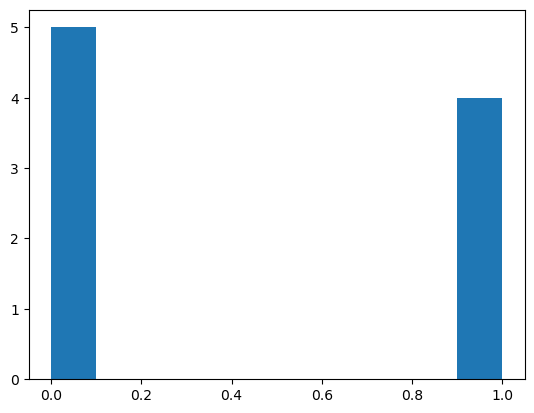

In [4]:
plt.hist(kernels.reshape(-1));

In [59]:
RESX = RESY = 320
timesteps = 20000
num_iters = 30
export_imgs = False

m_s = []
t_s = []

# Xi = []
# C = []
for j in tqdm(range(num_iters)):
    ca = init_isingCA()
    state = ca.initGrid((RESX, RESY))
    m = []
    t = []
    
    Mm = 0.
    M2m = 0.
    Em = 0.
    E2m = 0.
    for i in range(timesteps):
        state, E = ca.forward(state, return_E=True)

        if export_imgs:
            imgs.append(nx)
        
        energy = E.cpu().numpy()
        magnetization = state[0, 0].mean().cpu().numpy()
        temperature = 1. / ca.rule.beta.cpu().numpy()[0]
        
        # Mm += magnetization
        # M2m += magnetization ** 2
        # Em += energy
        # E2m += energy ** 2

        m.append(magnetization)
        t.append(temperature)
    
#     Mm /= timesteps
#     M2m /= timesteps
#     Em /= timesteps
#     E2m /= timesteps
    
#     Xi.append( (E2m - Em * Em) * (1 / temperature) ** 2 )
#     C.append( (M2m - Mm * Mm) * (1 / temperature) )
        
    m_s.append(m)
    t_s.append(t)

100%|██████████| 30/30 [06:47<00:00, 13.57s/it]
